# **Predicting Falcon 9 First Stage Landings to Optimize Launch Costs**


SpaceX’s Falcon 9 rocket offers significant cost savings due to its reusability—particularly the successful landing and reuse of its first stage. While traditional launch providers may charge up to $165 million per mission, SpaceX advertises costs as low as $62 million, made possible by recovering and reusing hardware.

In this project, we develop machine learning models that predict the likelihood of a Falcon 9 first stage landing successfully. These predictions can be used to:
* Estimate the expected cost of a launch
* Classify risk levels for upcoming launches
* Help satellite companies and mission planners make more informed, data-driven decisions when choosing a launch provider


## Objectives


1. Perform Feature Engineering and prepare data for ML Algorithm's implementation

    * Standardize the data
    * Split into training data and test data

2. Find best Hyperparameter for SVM, Classification Trees and Logistic Regression

    * Find the method performs best using test data


In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier

This function is to plot the confusion matrix.


In [2]:
def plot_confusion_matrix(y,y_predict):
    "this function plots the confusion matrix"
    from sklearn.metrics import confusion_matrix

    cm = confusion_matrix(y, y_predict)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); #annot=True to annotate cells
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['did not land', 'land']); ax.yaxis.set_ticklabels(['did not land', 'landed']) 
    plt.show() 

## Load the dataframe


Load the data


In [3]:
data = pd.read_csv("dataset_part_2.csv")


In [4]:
data.head()

,FlightNumber,Date,BoosterVersion,PayloadMass,Orbit,LaunchSite,Outcome,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial,Longitude,Latitude,Class,Year
0,1,2010-06-04,Falcon 9,6123.547647,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0003,-80.577366,28.561857,0,2010
1,2,2012-05-22,Falcon 9,525.000000,LEO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0005,-80.577366,28.561857,0,2012
2,3,2013-03-01,Falcon 9,677.000000,ISS,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B0007,-80.577366,28.561857,0,2013
3,4,2013-09-29,Falcon 9,500.000000,PO,VAFB SLC 4E,False Ocean,1,False,False,False,NaN,1.0,0,B1003,-120.610829,34.632093,0,2013
4,5,2013-12-03,Falcon 9,3170.000000,GTO,CCSFS SLC 40,None None,1,False,False,False,NaN,1.0,0,B1004,-80.577366,28.561857,0,2013


### Features Engineering 


In [5]:
features = data[['FlightNumber', 'PayloadMass', 'Orbit', 'LaunchSite', 'Flights', 'GridFins', 'Reused', 'Legs', 'LandingPad', 'Block', 'ReusedCount', 'Serial']]
features.head()

,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,LandingPad,Block,ReusedCount,Serial
0,1,6123.547647,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0003
1,2,525.000000,LEO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0005
2,3,677.000000,ISS,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B0007
3,4,500.000000,PO,VAFB SLC 4E,1,False,False,False,NaN,1.0,0,B1003
4,5,3170.000000,GTO,CCSFS SLC 40,1,False,False,False,NaN,1.0,0,B1004


In [6]:
X = pd.get_dummies(features, columns=['Orbit', 'LaunchSite', 'LandingPad', 'Serial'])
X.head()

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1,6123.547647,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.000000,1,False,False,False,1.0,0,False,False,...,False,False,False,False,False,False,False,False,False,False


In [7]:
X = X.astype('float64')

In [8]:
X.head(100)

,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1048,Serial_B1049,Serial_B1050,Serial_B1051,Serial_B1054,Serial_B1056,Serial_B1058,Serial_B1059,Serial_B1060,Serial_B1062
0,1.0,6123.547647,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2.0,525.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,3.0,677.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,4.0,500.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,5.0,3170.000000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
85,86.0,15600.000000,2.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
86,87.0,15600.000000,3.0,1.0,1.0,1.0,5.0,13.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
87,88.0,15600.000000,6.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
88,89.0,15600.000000,3.0,1.0,1.0,1.0,5.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [9]:
Y = data['Class'].to_numpy()

Standardize the data in <code>X</code> then reassign it to the variable  <code>X</code> using the transform provided below.


In [ ]:
transform = preprocessing.StandardScaler()
X_transformed = transform.fit_transform(X)

We split the data into training and testing data. The training data is divided into validation data, a second set used for training data; then the models are trained and hyperparameters are selected using the function <code>GridSearchCV</code>.


In [11]:
X_train, X_test, Y_train, Y_test = train_test_split(X_transformed, Y, test_size=0.2, random_state=2)

In [12]:
Y_test.shape

(18,)

## Modeling using Machine Learning Algorithms
1. Logistic Regression
2. Support Vector Machines
3. Decision Tree Classifiers
4. K-Nearest Neighbours


### 1. Logistic regression   

Create a  GridSearchCV object and fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [13]:
parameters ={'C':[0.01,0.1,1],
             'penalty':['l2'],
             'solver':['lbfgs']}

In [14]:
parameters ={"C":[0.01,0.1,1],'penalty':['l2'], 'solver':['lbfgs']}# l1 lasso l2 ridge
lr=LogisticRegression()

logreg_cv = GridSearchCV(lr, parameters, cv=10)
logreg_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=LogisticRegression(),
             param_grid={'C': [0.01, 0.1, 1], 'penalty': ['l2'],
                         'solver': ['lbfgs']})

Display the best parameters and the accuracy on the validation data.


In [15]:
print("tuned hpyerparameters :(best parameters) ",logreg_cv.best_params_)
print("accuracy :",logreg_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 0.1, 'penalty': 'l2', 'solver': 'lbfgs'}
accuracy : 0.8214285714285714


Calculate the accuracy on the test data


In [16]:
logreg_cv.score(X_test, Y_test)

0.8333333333333334

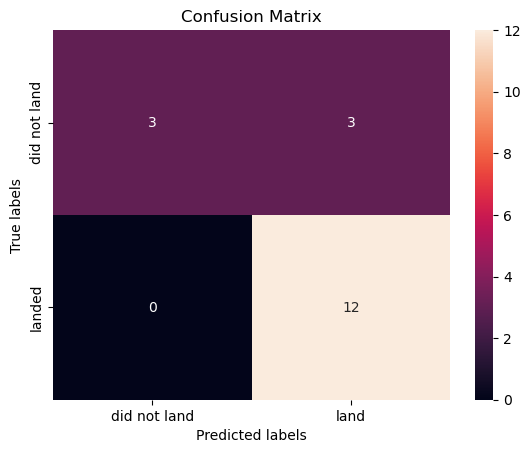

In [17]:
yhat=logreg_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

Overview:

True Postive - 12 (True label is landed, Predicted label is also landed)

False Postive - 3 (True label is not landed, Predicted label is landed)


Create a support vector machine object then  create a  <code>GridSearchCV</code> object  <code>svm_cv</code> with cv = 10.  Fit the object to find the best parameters from the dictionary <code>parameters</code>.


### 2. Support Vector Machine

Create a  GridSearchCV object and fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [18]:
parameters = {'kernel':('linear', 'rbf','poly','rbf', 'sigmoid'),
              'C': np.logspace(-3, 3, 5),
              'gamma':np.logspace(-3, 3, 5)}
svm = SVC()

In [19]:
svm_cv = GridSearchCV(svm, parameters, cv=10)
svm_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'gamma': array([1.00000000e-03, 3.16227766e-02, 1.00000000e+00, 3.16227766e+01,
       1.00000000e+03]),
                         'kernel': ('linear', 'rbf', 'poly', 'rbf', 'sigmoid')})

In [20]:
print("tuned hpyerparameters :(best parameters) ",svm_cv.best_params_)
print("accuracy :",svm_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'C': 1.0, 'gamma': 0.03162277660168379, 'kernel': 'sigmoid'}
accuracy : 0.8482142857142858


Calculate the accuracy on the test data


In [21]:
svm_cv.score(X_test, Y_test)

0.8333333333333334

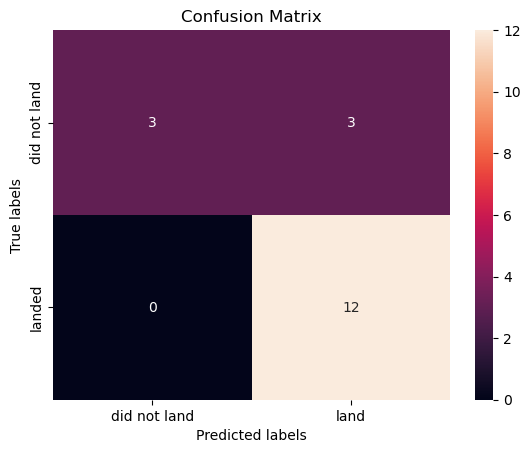

In [22]:
yhat=svm_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### 3. Decision Tree Classifier

Create a  GridSearchCV object and fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [23]:
parameters = {'criterion': ['gini', 'entropy'],
     'splitter': ['best', 'random'],
     'max_depth': [2*n for n in range(1,10)],
     'max_features': ['auto', 'sqrt'],
     'min_samples_leaf': [1, 2, 4],
     'min_samples_split': [2, 5, 10]}

tree = DecisionTreeClassifier()

In [24]:
tree_cv = GridSearchCV(tree, parameters, cv=10)
tree_cv.fit(X_train, Y_train)

/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py:540: FitFailedWarning: 
3240 fits failed out of a total of 6480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
3240 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 1466, in wrapper
    estimator._validate_params()
  File "/opt/anaconda3/lib/python3.12/site-packages/sklearn/base.py", line 666, in _validate_params
    validate_parameter_constraints(
  File "/opt/anaconda3/lib/python3.12/sit

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 4, 6, 8, 10, 12, 14, 16, 18],
                         'max_features': ['auto', 'sqrt'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']})

In [25]:
print("tuned hpyerparameters :(best parameters) ",tree_cv.best_params_)
print("accuracy :",tree_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'criterion': 'gini', 'max_depth': 8, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'random'}
accuracy : 0.8714285714285713


Calculate the accuracy of `tree_cv` on the test data


In [26]:
tree_cv.score(X_test, Y_test)

0.7222222222222222

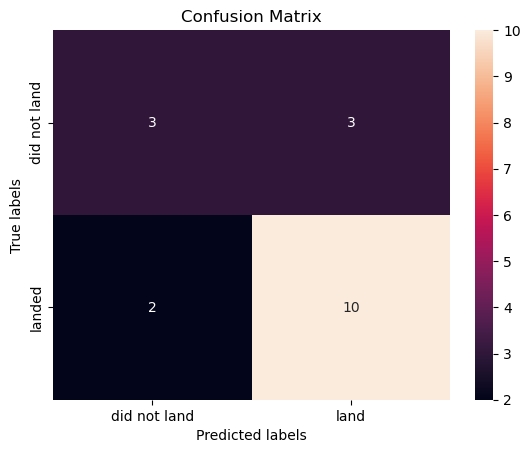

In [27]:
yhat = tree_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### 4. K-Nearest Neighbours

Create a  GridSearchCV object and fit the object to find the best parameters from the dictionary <code>parameters</code>.

In [28]:
parameters = {'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
              'p': [1,2]}

KNN = KNeighborsClassifier()

In [29]:
knn_cv = GridSearchCV(KNN, parameters, cv=10)
knn_cv.fit(X_train, Y_train)

GridSearchCV(cv=10, estimator=KNeighborsClassifier(),
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
                         'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
                         'p': [1, 2]})

In [30]:
print("tuned hpyerparameters :(best parameters) ",knn_cv.best_params_)
print("accuracy :",knn_cv.best_score_)

tuned hpyerparameters :(best parameters)  {'algorithm': 'auto', 'n_neighbors': 3, 'p': 1}
accuracy : 0.8339285714285714


Calculate the accuracy of `knn_cv` on the test data


In [31]:
knn_cv.score(X_test, Y_test)

0.7777777777777778

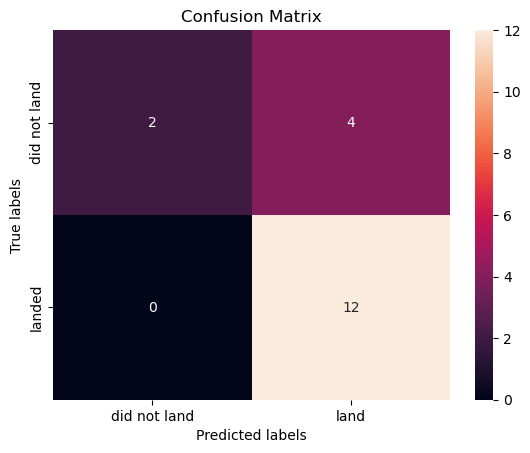

In [32]:
yhat = knn_cv.predict(X_test)
plot_confusion_matrix(Y_test,yhat)

### Find the method that performs best


In [33]:
# Print the best score for each model
print("Logistic Regression best score: ", logreg_cv.score(X_test, Y_test))
print("SVM best score: ", svm_cv.score(X_test, Y_test))
print("Decision Tree best score: ", tree_cv.score(X_test, Y_test))
print("KNN best score: ", knn_cv.score(X_test, Y_test))


Logistic Regression best score:  0.8333333333333334
SVM best score:  0.8333333333333334
Decision Tree best score:  0.7222222222222222
KNN best score:  0.7777777777777778


**Best model: Support Vector Machine (SVM) or Logistic Regression**

**Reasoning**:
This is because these models have the lowest number of False Positives, making the model more robust to predictions. A lower False Positive rate is critical in scenarios where incorrectly predicting a positive outcome (e.g., launch success when it actually fails) has significant consequences. Therefore, these models are more robust and reliable for accurate classification under the current dataset.

**Recommendations for Improvement**: As more launch data becomes available in the future, the dataset will become larger and more representative, allowing the models to better learn complex patterns. This would improve accuracy, generalizability, and robustness of predictions.

-----

## Stakeholder-focused Conclusion

Now, we use the model to make a stakeholder-focused, business-impact-driven project by defining a stakeholder, a problem, and a solution with recommendations.

**Stakeholder**: Satellite Deployment Manager / Satellite Customer (e.g., a telecom company or satellite startup)

**Problem Statement**: Satellite companies need to choose between SpaceX and other launch providers. However, the cost advantage of SpaceX is only realized if the Falcon 9 first stage successfully lands (and is reused). Predicting this in advance can help customers assess risk and negotiate contracts.

In [34]:
def prepare_input(input_dict, full_feature_columns, scaler, categorical_cols):
    """
    Transforms input dictionary into encoded and standardized DataFrame
    that matches model training format.
    """
    # Create DataFrame with one row
    df = pd.DataFrame([input_dict])

    # One-hot encode categorical features
    df_encoded = pd.get_dummies(df, columns=categorical_cols)

    # Ensure all columns from training are present (fill missing with 0)
    for col in full_feature_columns:
        if col not in df_encoded.columns:
            df_encoded[col] = 0.0
    
    # Reorder columns to match training
    df_encoded = df_encoded[full_feature_columns]

    # Standardize
    df_scaled = scaler.transform(df_encoded)

    return df_scaled


def predict_landing_success(model, input_dict, full_feature_columns, scaler, categorical_cols):
    """
    Predicts probability of first stage landing success and estimates launch cost.

    Parameters:
        - model: trained classification model (e.g., logistic regression)
        - input_dict: dictionary with launch configuration
        - full_feature_columns: list of feature names after get_dummies (from training)
        - scaler: StandardScaler object used during training
        - categorical_cols: list of categorical column names to one-hot encode

    Returns:
        - landing_probability (float)
        - expected_cost (float)
        - risk_level (str)
    """
    # Prepare input
    X_input = prepare_input(input_dict, full_feature_columns, scaler, categorical_cols)

    # Predict probability
    prob = model.predict_proba(X_input)[0][1]  # Probability of class = 1 (landing success)

    # Expected cost
    reused_cost = 62e6
    full_cost = 165e6
    expected_cost = prob * reused_cost + (1 - prob) * full_cost

    # Risk level
    if prob >= 0.85:
        risk = "Low"
    elif prob >= 0.65:
        risk = "Medium"
    else:
        risk = "High"

    return prob, expected_cost, risk


In [ ]:
full_feature_columns = X.columns.tolist()

# Save list of categorical columns used for encoding
categorical_cols = ['Orbit', 'LaunchSite', 'LandingPad', 'Serial']

# Use the trained model
model = logreg_cv

# Use the same scaler used during training
scaler = transform

# Define a sample input
new_launch = {
    'FlightNumber': 100,
    'PayloadMass': 5500.0,
    'Orbit': 'GTO',
    'LaunchSite': 'CCSFS SLC 40',
    'Flights': 3,
    'GridFins': True,
    'Reused': False,
    'Legs': True,
    'LandingPad': 'LZ-1',
    'Block': 5.0,
    'ReusedCount': 4.0,
    'Serial': 'B1049'
}

# Predict
prob, cost, risk = predict_landing_success(model, new_launch, full_feature_columns, scaler, categorical_cols)

# Show result
print(f"Landing Probability: {prob:.2%}")
print(f"Expected Launch Cost: ${cost:,.0f}")
print(f"Risk Level: {risk}")

Landing Probability: 85.19%
Expected Launch Cost: $77,249,562
Risk Level: Low


## Strategic Recommendation to the Stakeholder

Based on predicted landing success rates, satellite customers can strategically plan launch options and budgets:
1. For missions with high predicted success (>85%), choose SpaceX to save up to 40% in launch costs.
2. For lower success probabilities (<70%), either:
    * Negotiate lower launch prices with SpaceX due to risk
    * Purchase additional insurance
    * Choose a competitor for mission-critical launches